In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
ex = pd.read_csv("demonestration_before.csv")
ex.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [77]:
ex_done = pd.read_csv("demonstration_after.csv")
ex_done.head()

,Country,Age,Salary_Normalized,Purchased
0,0,44.0,0.6857,0
1,2,27.0,0.0000,1
2,1,30.0,0.1714,0
3,2,38.0,0.3714,0
4,1,40.0,0.4508,1


In [41]:
df = pd.read_csv("covid.csv")

In [42]:
df.head()

,Patient_ID,Age,Gender,Region,Preexisting_Condition,Date_of_Infection,COVID_Strain,Symptoms,Severity,Hospitalized,...,Date_of_Reinfection,Vaccination_Status,Vaccine_Type,Doses_Received,Date_of_Last_Dose,Long_COVID_Symptoms,Occupation,Smoking_Status,BMI,Recovery_Classification
0,1,69,Male,Hovedstaden,Obesity,2022-06-21,Delta,Mild,Moderate,Yes,...,2022-12-15,Yes,NaN,1,2022-09-22,NaN,Healthcare,Never,27.7,Delayed Recovery
1,2,38,Male,Sjælland,Asthma,2024-02-02,XBB.1.5,Mild,Moderate,No,...,2024-06-08,No,NaN,0,2023-08-21,NaN,Healthcare,Never,21.9,Typical Recovery
2,3,41,Female,Syddanmark,Hypertension,2023-05-28,Beta,Mild,High,Yes,...,2023-12-19,Yes,Janssen,3,2024-05-14,NaN,Unemployed,Never,22.7,Delayed Recovery
3,4,81,Female,Hovedstaden,Asthma,2023-08-13,Delta,Severe,High,No,...,2024-08-24,Yes,AstraZeneca,1,2024-10-31,NaN,Office Worker,Never,27.7,Delayed Recovery
4,5,50,Female,Syddanmark,Cardiovascular,2023-03-10,Delta,Mild,High,No,...,2023-09-08,Yes,NaN,2,2023-07-05,NaN,Student,Never,11.9,Delayed Recovery


In [43]:
df.shape

(3000, 27)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               3000 non-null   int64  
 1   Age                      3000 non-null   int64  
 2   Gender                   3000 non-null   object 
 3   Region                   3000 non-null   object 
 4   Preexisting_Condition    2531 non-null   object 
 5   Date_of_Infection        3000 non-null   object 
 6   COVID_Strain             3000 non-null   object 
 7   Symptoms                 3000 non-null   object 
 8   Severity                 3000 non-null   object 
 9   Hospitalized             3000 non-null   object 
 10  Hospital_Admission_Date  2850 non-null   object 
 11  Hospital_Discharge_Date  2850 non-null   object 
 12  ICU_Admission            3000 non-null   object 
 13  Ventilator_Support       3000 non-null   object 
 14  Recovered               

In [45]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Region,0
Preexisting_Condition,469
Date_of_Infection,0
COVID_Strain,0
Symptoms,0
Severity,0
Hospitalized,0


In [46]:
df.drop(columns=['Long_COVID_Symptoms'], inplace=True)

In [47]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Region,0
Preexisting_Condition,469
Date_of_Infection,0
COVID_Strain,0
Symptoms,0
Severity,0
Hospitalized,0


In [48]:
df.ffill(inplace=True)

In [49]:
df = df.drop_duplicates()

In [50]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Region,0
Preexisting_Condition,0
Date_of_Infection,0
COVID_Strain,0
Symptoms,0
Severity,0
Hospitalized,0


In [51]:
df.dropna(inplace=True)

In [52]:
df['Date_of_Infection'] = pd.to_datetime(df['Date_of_Infection'])
df['Date_of_Recovery'] = pd.to_datetime(df['Date_of_Recovery'])
df['Date_of_Reinfection'] = pd.to_datetime(df['Date_of_Reinfection'])
df['Date_of_Last_Dose'] = pd.to_datetime(df['Date_of_Last_Dose'])
df['Hospital_Admission_Date'] = pd.to_datetime(df['Hospital_Admission_Date'])
df['Hospital_Discharge_Date'] = pd.to_datetime(df['Hospital_Discharge_Date'])

In [53]:
df.select_dtypes(include='object').columns

Index(['Gender', 'Region', 'Preexisting_Condition', 'COVID_Strain', 'Symptoms',
       'Severity', 'Hospitalized', 'ICU_Admission', 'Ventilator_Support',
       'Recovered', 'Reinfection', 'Vaccination_Status', 'Vaccine_Type',
       'Occupation', 'Smoking_Status', 'Recovery_Classification'],
      dtype='object')

In [54]:

from sklearn.preprocessing import LabelEncoder
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print("Object columns after encoding:")
print(df.select_dtypes(include='object').columns)

Object columns after encoding:
Index([], dtype='object')


In [55]:
df.head()

,Patient_ID,Age,Gender,Region,Preexisting_Condition,Date_of_Infection,COVID_Strain,Symptoms,Severity,Hospitalized,...,Reinfection,Date_of_Reinfection,Vaccination_Status,Vaccine_Type,Doses_Received,Date_of_Last_Dose,Occupation,Smoking_Status,BMI,Recovery_Classification
2,3,41,0,4,3,2023-05-28,1,0,1,1,...,0,2023-12-19,1,1,3,2024-05-14,5,2,22.7,0
3,4,81,0,0,0,2023-08-13,2,2,1,0,...,1,2024-08-24,1,0,1,2024-10-31,2,2,27.7,0
4,5,50,0,4,1,2023-03-10,2,0,1,0,...,0,2023-09-08,1,0,2,2023-07-05,3,2,11.9,0
5,6,66,1,3,1,2022-07-04,3,1,3,0,...,0,2023-02-22,1,0,3,2025-03-07,1,2,29.8,0
6,7,76,0,3,4,2023-04-30,3,1,0,1,...,0,2023-08-04,0,0,0,2022-10-12,5,1,22.3,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 2 to 2999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Patient_ID               2998 non-null   int64         
 1   Age                      2998 non-null   int64         
 2   Gender                   2998 non-null   int64         
 3   Region                   2998 non-null   int64         
 4   Preexisting_Condition    2998 non-null   int64         
 5   Date_of_Infection        2998 non-null   datetime64[ns]
 6   COVID_Strain             2998 non-null   int64         
 7   Symptoms                 2998 non-null   int64         
 8   Severity                 2998 non-null   int64         
 9   Hospitalized             2998 non-null   int64         
 10  Hospital_Admission_Date  2998 non-null   datetime64[ns]
 11  Hospital_Discharge_Date  2998 non-null   datetime64[ns]
 12  ICU_Admission            2998 non-null 

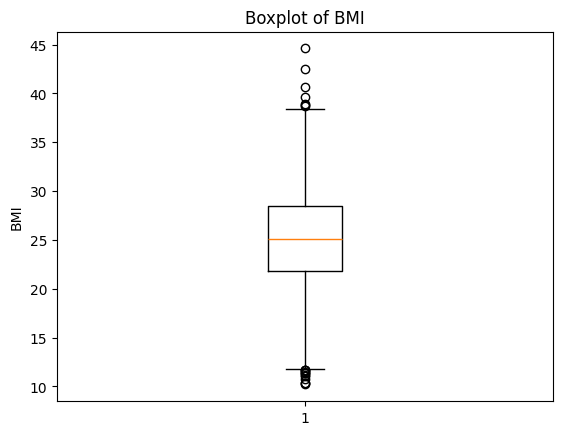

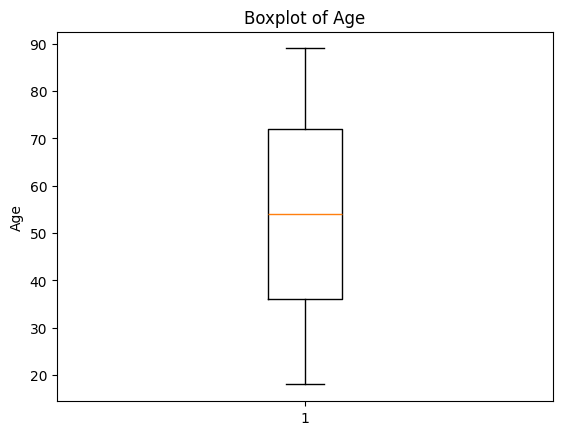

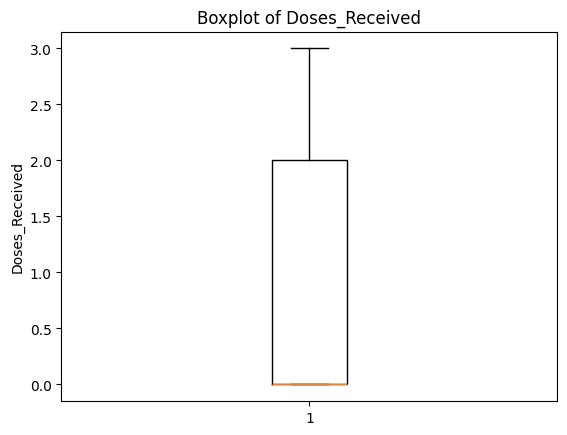

In [57]:
def remove_outliers_iqr(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]

    return df_cleaned

numerical = ['BMI', 'Age', 'Doses_Received']

for col in numerical:
  plt.figure()
  plt.boxplot(df[col].dropna())
  plt.title(f"Boxplot of {col}")
  plt.ylabel(col)
  plt.show()

In [58]:
df = remove_outliers_iqr(df, 'BMI')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 2 to 2999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Patient_ID               2979 non-null   int64         
 1   Age                      2979 non-null   int64         
 2   Gender                   2979 non-null   int64         
 3   Region                   2979 non-null   int64         
 4   Preexisting_Condition    2979 non-null   int64         
 5   Date_of_Infection        2979 non-null   datetime64[ns]
 6   COVID_Strain             2979 non-null   int64         
 7   Symptoms                 2979 non-null   int64         
 8   Severity                 2979 non-null   int64         
 9   Hospitalized             2979 non-null   int64         
 10  Hospital_Admission_Date  2979 non-null   datetime64[ns]
 11  Hospital_Discharge_Date  2979 non-null   datetime64[ns]
 12  ICU_Admission            2979 non-null 

In [60]:
date_cols = df.select_dtypes(include='datetime64[ns]').columns
for col in date_cols:
    df[col + "_year"] = df[col].dt.year
    df[col + "_month"] = df[col].dt.month
    df[col + "_day"] = df[col].dt.day


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 2 to 2999
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Patient_ID                     2979 non-null   int64         
 1   Age                            2979 non-null   int64         
 2   Gender                         2979 non-null   int64         
 3   Region                         2979 non-null   int64         
 4   Preexisting_Condition          2979 non-null   int64         
 5   Date_of_Infection              2979 non-null   datetime64[ns]
 6   COVID_Strain                   2979 non-null   int64         
 7   Symptoms                       2979 non-null   int64         
 8   Severity                       2979 non-null   int64         
 9   Hospitalized                   2979 non-null   int64         
 10  Hospital_Admission_Date        2979 non-null   datetime64[ns]
 11  Hospital_Discharge_Dat

In [62]:
df.drop(columns=list(date_cols), inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 2 to 2999
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_ID                     2979 non-null   int64  
 1   Age                            2979 non-null   int64  
 2   Gender                         2979 non-null   int64  
 3   Region                         2979 non-null   int64  
 4   Preexisting_Condition          2979 non-null   int64  
 5   COVID_Strain                   2979 non-null   int64  
 6   Symptoms                       2979 non-null   int64  
 7   Severity                       2979 non-null   int64  
 8   Hospitalized                   2979 non-null   int64  
 9   ICU_Admission                  2979 non-null   int64  
 10  Ventilator_Support             2979 non-null   int64  
 11  Recovered                      2979 non-null   int64  
 12  Reinfection                    2979 non-null   int64 

In [64]:
df.head()

,Patient_ID,Age,Gender,Region,Preexisting_Condition,COVID_Strain,Symptoms,Severity,Hospitalized,ICU_Admission,...,Hospital_Discharge_Date_day,Date_of_Recovery_year,Date_of_Recovery_month,Date_of_Recovery_day,Date_of_Reinfection_year,Date_of_Reinfection_month,Date_of_Reinfection_day,Date_of_Last_Dose_year,Date_of_Last_Dose_month,Date_of_Last_Dose_day
2,3,41,0,4,3,1,0,1,1,1,...,26,2023,7,15,2023,12,19,2024,5,14
3,4,81,0,0,0,2,2,1,0,0,...,24,2025,2,9,2024,8,24,2024,10,31
4,5,50,0,4,1,2,0,1,0,0,...,15,2023,4,20,2023,9,8,2023,7,5
5,6,66,1,3,1,3,1,3,0,0,...,10,2024,3,15,2023,2,22,2025,3,7
6,7,76,0,3,4,3,1,0,1,1,...,6,2023,6,12,2023,8,4,2022,10,12


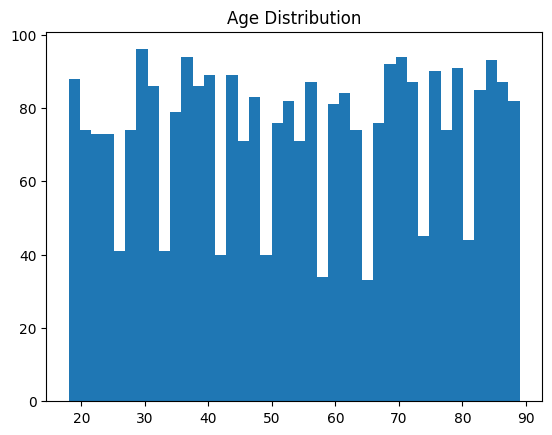

In [65]:
plt.figure()
plt.hist(df["Age"], bins=40)
plt.title("Age Distribution")
plt.show()

In [66]:
df[df["Age"] < 0]

,Patient_ID,Age,Gender,Region,Preexisting_Condition,COVID_Strain,Symptoms,Severity,Hospitalized,ICU_Admission,...,Hospital_Discharge_Date_day,Date_of_Recovery_year,Date_of_Recovery_month,Date_of_Recovery_day,Date_of_Reinfection_year,Date_of_Reinfection_month,Date_of_Reinfection_day,Date_of_Last_Dose_year,Date_of_Last_Dose_month,Date_of_Last_Dose_day


In [67]:
df[df["Age"] > 120]

,Patient_ID,Age,Gender,Region,Preexisting_Condition,COVID_Strain,Symptoms,Severity,Hospitalized,ICU_Admission,...,Hospital_Discharge_Date_day,Date_of_Recovery_year,Date_of_Recovery_month,Date_of_Recovery_day,Date_of_Reinfection_year,Date_of_Reinfection_month,Date_of_Reinfection_day,Date_of_Last_Dose_year,Date_of_Last_Dose_month,Date_of_Last_Dose_day


In [68]:
df[df["BMI"] < 10]

,Patient_ID,Age,Gender,Region,Preexisting_Condition,COVID_Strain,Symptoms,Severity,Hospitalized,ICU_Admission,...,Hospital_Discharge_Date_day,Date_of_Recovery_year,Date_of_Recovery_month,Date_of_Recovery_day,Date_of_Reinfection_year,Date_of_Reinfection_month,Date_of_Reinfection_day,Date_of_Last_Dose_year,Date_of_Last_Dose_month,Date_of_Last_Dose_day


In [69]:
df[df["BMI"] > 60]

,Patient_ID,Age,Gender,Region,Preexisting_Condition,COVID_Strain,Symptoms,Severity,Hospitalized,ICU_Admission,...,Hospital_Discharge_Date_day,Date_of_Recovery_year,Date_of_Recovery_month,Date_of_Recovery_day,Date_of_Reinfection_year,Date_of_Reinfection_month,Date_of_Reinfection_day,Date_of_Last_Dose_year,Date_of_Last_Dose_month,Date_of_Last_Dose_day


In [70]:
df[df["Doses_Received"] > 10]

,Patient_ID,Age,Gender,Region,Preexisting_Condition,COVID_Strain,Symptoms,Severity,Hospitalized,ICU_Admission,...,Hospital_Discharge_Date_day,Date_of_Recovery_year,Date_of_Recovery_month,Date_of_Recovery_day,Date_of_Reinfection_year,Date_of_Reinfection_month,Date_of_Reinfection_day,Date_of_Last_Dose_year,Date_of_Last_Dose_month,Date_of_Last_Dose_day


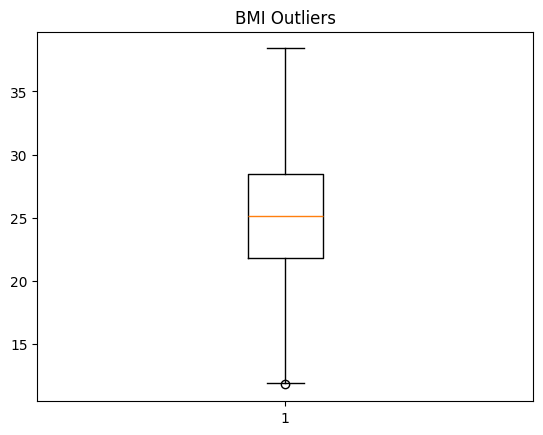

In [71]:
plt.figure()
plt.boxplot(df["BMI"].dropna())
plt.title("BMI Outliers")
plt.show()

In [72]:
print(df['BMI'].describe())
print("Mean:", df['BMI'].mean())
print("Std:", df['BMI'].std())
print("Min:", df['BMI'].min())
print("Max:", df['BMI'].max())

count    2979.000000
mean       25.116683
std         4.774836
min        11.800000
25%        21.800000
50%        25.100000
75%        28.450000
max        38.400000
Name: BMI, dtype: float64
Mean: 25.116683450822425
Std: 4.774836128204493
Min: 11.8
Max: 38.4


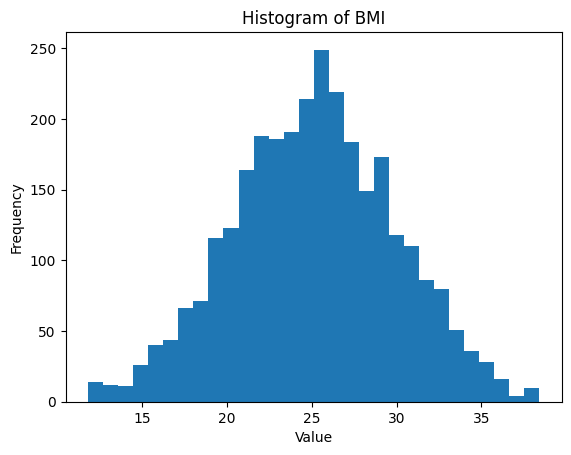

In [74]:
plt.hist(df['BMI'], bins=30)
plt.title("Histogram of BMI")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X = df.drop(columns=['BMI'])
y = df['BMI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)